In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import scipy as sc
import pandas as pd 
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pymysql
import sqlalchemy as sql
from sqlalchemy import create_engine
import sys
from io import StringIO
%matplotlib inline

In [2]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mse_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mse_error

In [3]:
def cost(predictions, targets,iterations):
    '''
    Returns the final cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
   
    for it in range(iterations):
        
        cost_history[it]  = mse(predictions, targets)
        
    return cost_history

In [4]:
car_data = pd.read_csv('carData.csv')


In [5]:
car_data["Year"]=2020-car_data["Year"]

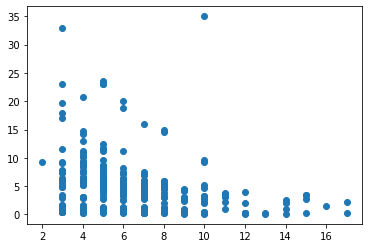

In [6]:
x1=np.array(car_data["Year"])
y=np.array(car_data["Selling_Price"])
x=x1.reshape(-1, 1)

plt.scatter(x1, y)

Coeff R2 = 0.0498724773069249


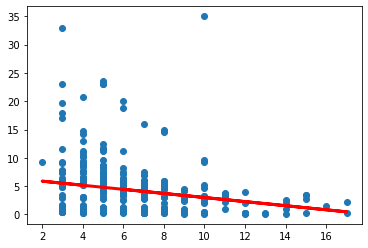

In [7]:
model2 = SGDRegressor(max_iter=1000, eta0=0.01)
model2.fit(x,y) 
print('Coeff R2 =', model2.score(x, y))
plt.scatter(x1, y)
plt.plot(x, model2.predict(x), c='red',lw=3)


/home/bassembhiri/anaconda3/envs/MLearning/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


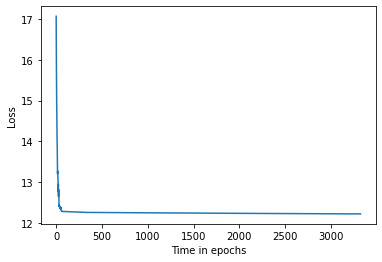

In [8]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDRegressor(loss="squared_loss",penalty='l2',max_iter=np.ceil(10**6 / len(y)), eta0=0.001,learning_rate='adaptive',tol=1e-5, verbose=1)
clf.fit(x,y)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
#plt.savefig("warmstart_plots/pure_SGD:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
Y=car_data["Selling_Price"]
X=car_data[["Year","Kms_Driven","Present_Price"]]

In [10]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["Year","Kms_Driven","Present_Price"]])

In [11]:
modelmulti=SGDRegressor(loss="squared_loss",penalty='l2',max_iter=1000, eta0=0.001,learning_rate='adaptive',tol=1e-3)
modelmulti.fit(X_scaled,Y) 
print('Coeff R2 =', modelmulti.score(X_scaled, Y))
print('Our multiple linear model had an R^2 of: %0.3f'% modelmulti.score(X_scaled, Y))

Coeff R2 = 0.8500791149222887
Our multiple linear model had an R^2 of: 0.850


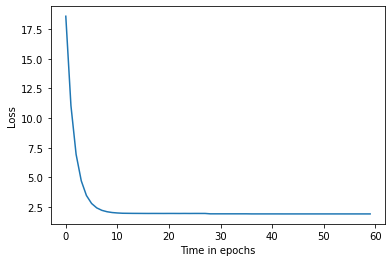

In [12]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
modelmulti = SGDRegressor(loss="squared_loss",penalty='l2',max_iter=np.ceil(10**6 / len(y)), eta0=0.001,learning_rate='adaptive',tol=1e-5, verbose=1)
modelmulti.fit(X_scaled,Y) 
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
#plt.savefig("warmstart_plots/pure_SGD:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [13]:
loss_list

[18.574781,
 11.037354,
 6.941141,
 4.716835,
 3.480917,
 2.808649,
 2.436751,
 2.22945,
 2.113722,
 2.045397,
 2.009618,
 1.985768,
 1.980452,
 1.975646,
 1.973619,
 1.970863,
 1.968719,
 1.970282,
 1.968895,
 1.967982,
 1.969776,
 1.969327,
 1.966971,
 1.970462,
 1.967507,
 1.970184,
 1.969442,
 1.969309,
 1.937853,
 1.937867,
 1.937706,
 1.93775,
 1.93776,
 1.937789,
 1.93776,
 1.937764,
 1.93154,
 1.931541,
 1.931536,
 1.931531,
 1.931526,
 1.931523,
 1.930285,
 1.930284,
 1.930284,
 1.930283,
 1.930282,
 1.930281,
 1.930034,
 1.930033,
 1.930033,
 1.930033,
 1.930033,
 1.930033,
 1.929983,
 1.929983,
 1.929983,
 1.929983,
 1.929983,
 1.929983]

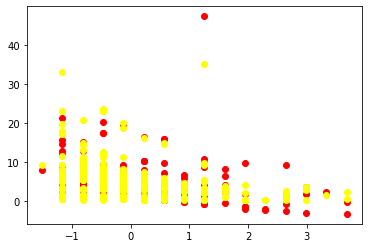

In [14]:
plt.scatter(X_scaled[:,0],modelmulti.predict(X_scaled),c='red')
plt.scatter(X_scaled[:,0],Y,c='yellow')

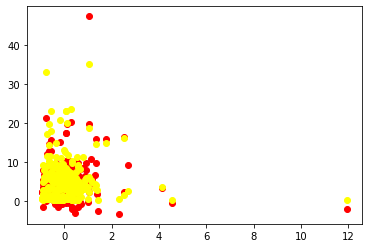

In [15]:
plt.scatter(X_scaled[:,1],modelmulti.predict(X_scaled),c='red')
plt.scatter(X_scaled[:,1],Y,c='yellow')

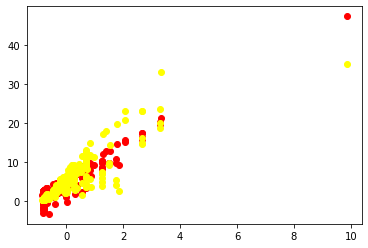

In [16]:
plt.scatter(X_scaled[:,2],modelmulti.predict(X_scaled),c='red')
plt.scatter(X_scaled[:,2],Y,c='yellow')

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X_scaled, Y, test_size=0.33, random_state=42)

In [17]:
car_data['Transmission'] = car_data['Transmission'].astype('category').cat.codes

In [18]:
Y=car_data["Selling_Price"]
X=car_data[["Year","Kms_Driven","Present_Price","Transmission"]]

In [19]:
scale = StandardScaler()
X_scaled0 = scale.fit_transform(X[["Year","Kms_Driven","Present_Price","Transmission"]])

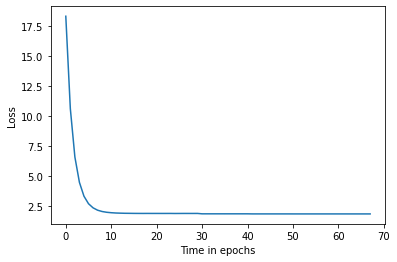

In [35]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
modelmulti0 = SGDRegressor(loss="squared_loss",penalty='l2',max_iter=np.ceil(10**6 / len(Y)), eta0=0.001,learning_rate='adaptive',tol=1e-5, verbose=1)
modelmulti0.fit(X_scaled0,Y) 

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
#plt.savefig("warmstart_plots/pure_SGD:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()


In [34]:
print('Our multiple linear model had an R^2 of: %0.3f'% modelmulti0.score(X_scaled0, Y))

Our multiple linear model had an R^2 of: 0.854


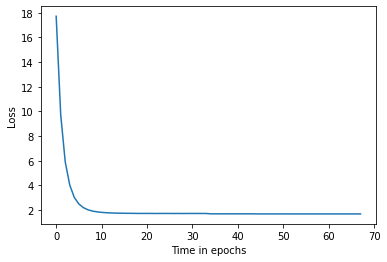

In [36]:
car_data['Fuel_Type'] = car_data['Fuel_Type'].astype('category').cat.codes
Y=car_data["Selling_Price"]
X=car_data[["Year","Kms_Driven","Present_Price","Transmission","Fuel_Type"]]
scale = StandardScaler()
X_scaled1 = scale.fit_transform(X[["Year","Kms_Driven","Present_Price","Transmission","Fuel_Type"]])
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
modelmulti1 = SGDRegressor(loss="squared_loss",penalty='l2',max_iter=np.ceil(10**6 / len(Y)), eta0=0.001,learning_rate='adaptive',tol=1e-5, verbose=1)
modelmulti1.fit(X_scaled1,Y) 

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
#plt.savefig("warmstart_plots/pure_SGD:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()



In [22]:
print('Our multiple linear model had an R^2 of: %0.3f'% modelmulti1.score(X_scaled1, Y))

Our multiple linear model had an R^2 of: 0.869


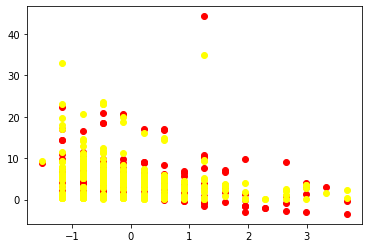

In [23]:
plt.scatter(X_scaled1[:,0],modelmulti1.predict(X_scaled1),c='red')
plt.scatter(X_scaled1[:,0],Y,c='yellow')


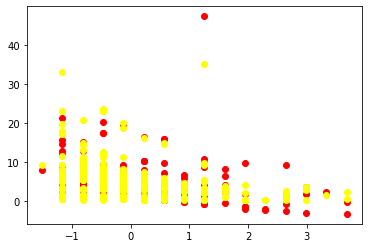

In [24]:
plt.scatter(X_scaled[:,0],modelmulti.predict(X_scaled),c='red')
plt.scatter(X_scaled[:,0],Y,c='yellow')

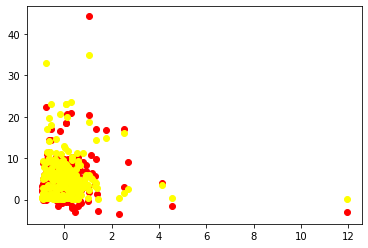

In [25]:
plt.scatter(X_scaled1[:,1],modelmulti1.predict(X_scaled1),c='red')
plt.scatter(X_scaled1[:,1],Y,c='yellow')

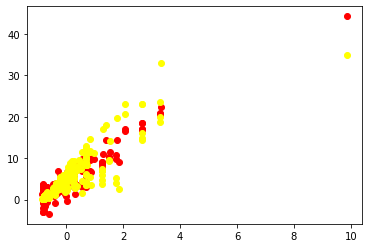

In [26]:
plt.scatter(X_scaled1[:,2],modelmulti1.predict(X_scaled1),c='red')
plt.scatter(X_scaled1[:,2],Y,c='yellow')

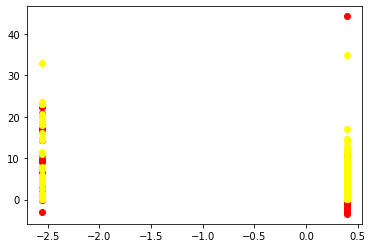

In [27]:
plt.scatter(X_scaled1[:,3],modelmulti1.predict(X_scaled1),c='red')
plt.scatter(X_scaled1[:,3],Y,c='yellow')

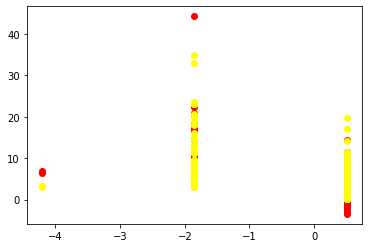

In [28]:
plt.scatter(X_scaled1[:,4],modelmulti1.predict(X_scaled1),c='red')
plt.scatter(X_scaled1[:,4],Y,c='yellow')

In [29]:
print(modelmulti1.intercept_, modelmulti1.coef_)

[4.66022191] [-1.23693487 -0.21977661  4.08466958 -0.42040997 -0.72573995]


In [30]:
modelmulti1.intercept_

array([4.66022191])

In [31]:
modelmulti1.coef_

array([-1.23693487, -0.21977661,  4.08466958, -0.42040997, -0.72573995])

In [32]:
modelmulti0.coef_

array([-1.35996086, -0.09035922,  4.4195009 , -0.34007737])

In [33]:
modelmulti1.intercept_

array([4.66022191])